In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv('/content/zomato_restaurants_in_India.csv')

In [4]:
df = pd.DataFrame(dataset)

In [5]:
#exploring dataframe

print("Shape of DataFrame: ", df.shape)

print("Statistical Info: ", df.info())

Shape of DataFrame:  (34173, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34173 entries, 0 to 34172
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                34173 non-null  int64  
 1   name                  34173 non-null  object 
 2   establishment         34173 non-null  object 
 3   url                   34173 non-null  object 
 4   address               34172 non-null  object 
 5   city                  34173 non-null  object 
 6   city_id               34173 non-null  int64  
 7   locality              34173 non-null  object 
 8   latitude              34173 non-null  float64
 9   longitude             34173 non-null  float64
 10  zipcode               8769 non-null   object 
 11  country_id            34172 non-null  float64
 12  locality_verbose      34172 non-null  object 
 13  cuisines              34140 non-null  object 
 14  timings               33924 non-null 

# Task 01: Data Cleaning and Preparation

In [6]:
#checking the missing values in dataframe(
df.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                     1
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 25404
country_id                  1
locality_verbose            1
cuisines                   33
timings                   249
average_cost_for_two        1
price_range                 1
currency                    1
highlights                  1
aggregate_rating            1
rating_text                 1
votes                       1
photo_count                 1
opentable_support           3
delivery                    1
takeaway                    1
dtype: int64

In [7]:
#creating a copy of dataset. Further will work on df_copy
df_copy = df.copy()

In [8]:
df_copy['opentable_support'].isna().sum()#opentable support has 48 missing values with the column datatype of float64
opentable_support_mean = df_copy['opentable_support'].mean()
df_copy['opentable_support'] = df_copy['opentable_support'].fillna(opentable_support_mean)

In [9]:
df_copy.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                     1
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 25404
country_id                  1
locality_verbose            1
cuisines                   33
timings                   249
average_cost_for_two        1
price_range                 1
currency                    1
highlights                  1
aggregate_rating            1
rating_text                 1
votes                       1
photo_count                 1
opentable_support           0
delivery                    1
takeaway                    1
dtype: int64

In [10]:

df_copy['timings'].dtypes

df['timings']
#not cleaning timing column, seems hard to interpret.

#deleting the column timings, due to huge inconsitency

del df_copy['timings']




In [11]:
#imputig missing values in cuisines column
cuisines_mode = df_copy['cuisines'].mode()[0]  #replacing column with most frequent values

df_copy['cuisines'] = df_copy['cuisines'].fillna(cuisines_mode)

print("Missing values in Cuisines:", df_copy['cuisines'].isna().sum())

df_copy['cuisines'].isna().sum()


Missing values in Cuisines: 0


0

In [12]:
df_copy['zipcode'] = df_copy['zipcode'].fillna(df_copy['zipcode'].mode()[0])

print("missing values in zip code:" , df_copy['zipcode'].isna().sum())

missing values in zip code: 0


In [13]:
#address column has 134 missing values, replacing them with the most frquent values
df_copy['address'] = df_copy['address'].fillna(df_copy['address'].mode()[0])

print("Missing values in address:", df_copy['address'].isna().sum())

Missing values in address: 0


In [14]:
#deleting url column, because it only consists of url link
del df_copy['url']

In [15]:
#final checks for missing values

df_copy.isna().sum()

res_id                  0
name                    0
establishment           0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              1
locality_verbose        1
cuisines                0
average_cost_for_two    1
price_range             1
currency                1
highlights              1
aggregate_rating        1
rating_text             1
votes                   1
photo_count             1
opentable_support       0
delivery                1
takeaway                1
dtype: int64

In [16]:
#filling missing value in city column

a=df_copy['city'].mode()[0]
df_copy['city'] = df_copy['city'].fillna(a)

df_copy['city'].isna().sum()

0

In [17]:
#filling missing value in city_id column, it has all float values
b  =  df_copy['city_id'].median()

df_copy['city_id'] = df_copy['city_id'].fillna(b)

In [18]:
c = df_copy['latitude'].median()
df_copy['latitude'] = df_copy['latitude'].fillna(c)

In [19]:
df_copy['longitude'].median()
df_copy['longitude'] = df_copy['longitude'].fillna(df_copy['longitude'].median())

df_copy['longitude'].isna().sum()


0

In [20]:
df_copy['country_id'].mean()
df_copy['country_id']= df_copy['country_id'].fillna(df_copy['country_id'].mean())

In [21]:
df_copy['locality_verbose'].mode()[0]

df_copy['locality_verbose'] = df_copy['locality_verbose'].fillna(df_copy['locality_verbose'].mode()[0])

In [22]:
df_copy['locality'] = df_copy['locality'].fillna(df_copy['locality'].mode()[0])

In [23]:
df_copy['average_cost_for_two']= df_copy['average_cost_for_two'].fillna(df_copy['average_cost_for_two'].median())

In [24]:
df_copy['price_range'] = df_copy['price_range'].fillna(df_copy['price_range'].median())

In [25]:
df_copy['currency']    #currency column doesn't contains any currency value
#dropping it

del df_copy['currency']

In [26]:
df_copy['highlights'].mode()

0    []
Name: highlights, dtype: object

In [27]:
df_copy['aggregate_rating']=df_copy['aggregate_rating'].fillna(df_copy['aggregate_rating'].median())

In [28]:
df_copy['rating_text'] = df_copy['rating_text'].fillna(df_copy['rating_text'].mode()[0])

In [29]:
df_copy['votes']= df_copy['votes'].fillna(df_copy['votes'].median())

In [30]:
df_copy['photo_count'] = df_copy['photo_count'].fillna(df_copy['photo_count'].median())

In [31]:
df_copy['delivery']=df_copy['delivery'].fillna(df_copy['delivery'].median())

In [32]:
df_copy['takeaway'] = df_copy['takeaway'].fillna(df_copy['takeaway'].median())

In [33]:
df_copy['highlights'] = df_copy['highlights'].str.strip('[]').str.strip()
df_copy['highlights'] = df_copy['highlights'].str.strip("'").str.strip()

In [34]:
df_copy['establishment'] = df_copy['establishment'].str.strip('[]').str.strip()
df_copy['establishment'] = df_copy['establishment'].str.strip("'").str.strip()

In [35]:
print(df_copy['establishment'])

0          Quick Bites
1          Quick Bites
2          Quick Bites
3          Quick Bites
4        Casual Dining
             ...      
34168             Café
34169             Café
34170    Casual Dining
34171             Café
34172             Café
Name: establishment, Length: 34173, dtype: object


In [36]:
df_copy['highlights']

0        Lunch', 'Takeaway Available', 'Credit Card', '...
1        Delivery', 'No Alcohol Available', 'Dinner', '...
2        No Alcohol Available', 'Dinner', 'Takeaway Ava...
3        Takeaway Available', 'Credit Card', 'Lunch', '...
4        Lunch', 'Serves Alcohol', 'Cash', 'Credit Card...
                               ...                        
34168    Mall Parking', 'Dinner', 'Breakfast', 'Cash', ...
34169    Dinner', 'Cash', 'Debit Card', 'Lunch', 'Credi...
34170    Debit Card', 'Takeaway Available', 'Credit Car...
34171    Takeaway Available', 'Credit Card', 'Dinner', ...
34172                                                  NaN
Name: highlights, Length: 34173, dtype: object

In [37]:
df2 = df_copy.copy()        #here df is the cleaned dataset, with duplicates removed
df2 = df2.drop_duplicates()

In [38]:
df2.shape

(11291, 23)

In [39]:
df2.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,1.129100e+04,11291.000000,11291.000000,11291.000000,11291.0,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,11291.0,11291.000000,11291.0
mean,1.077370e+07,1194.291648,21.561816,76.281470,1.0,535.535471,1.720928,3.101355,319.293331,181.275972,0.0,-0.284474,-1.0
std,8.689535e+06,3452.225247,6.960820,9.315807,0.0,533.590577,0.852426,1.444956,839.158751,535.417728,0.0,0.955997,0.0
min,5.000400e+04,4.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,2.200932e+06,11.000000,13.039287,75.320805,1.0,200.000000,1.000000,2.900000,8.000000,2.000000,0.0,-1.000000,-1.0
50%,1.836983e+07,22.000000,23.036326,77.435727,1.0,400.000000,1.000000,3.600000,57.000000,17.000000,0.0,-1.000000,-1.0
75%,1.882175e+07,29.000000,27.158221,77.754495,1.0,600.000000,2.000000,4.000000,276.000000,107.000000,0.0,1.000000,-1.0
max,1.915915e+07,11335.000000,31.824851,85.883076,1.0,14000.000000,4.000000,4.900000,18967.000000,12196.000000,0.0,1.000000,-1.0


# Task 2: Exploratory Data Analysis

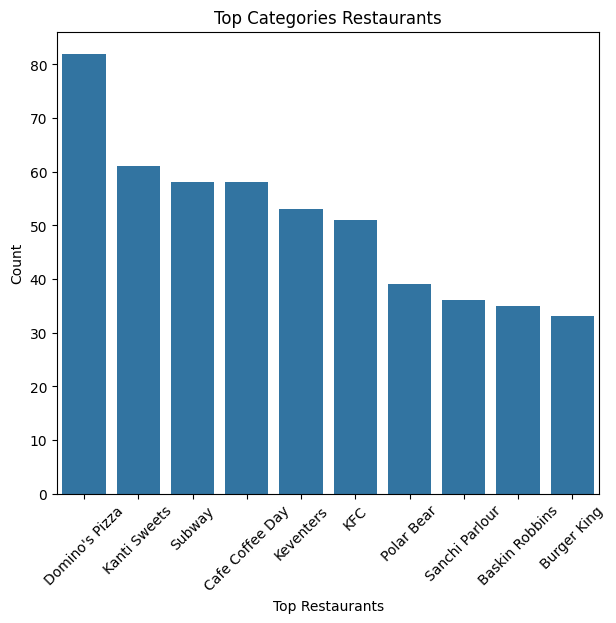

In [40]:


#top restuarants
value_counts = df2['name'].value_counts()

# Plot bar chart for top N categories
top_categories = value_counts.head(10)  # Adjust number of top categories as needed
plt.figure(figsize=(7, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top Categories Restaurants')
plt.xlabel('Top Restaurants')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

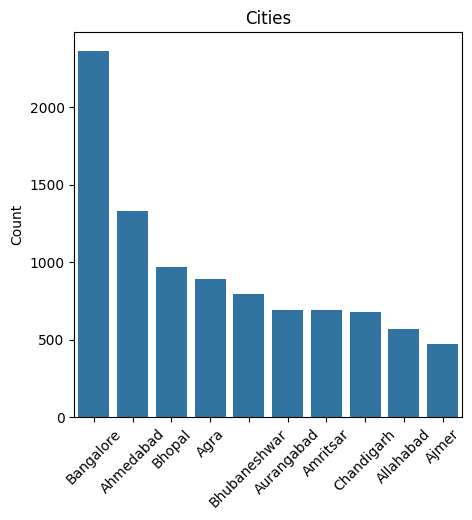

In [41]:
value_counts = df2['city'].value_counts()

# Plot bar chart for top N categories
top_categories = value_counts.head(10)  # Adjust number of top categories as needed
plt.figure(figsize=(5, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Cities')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

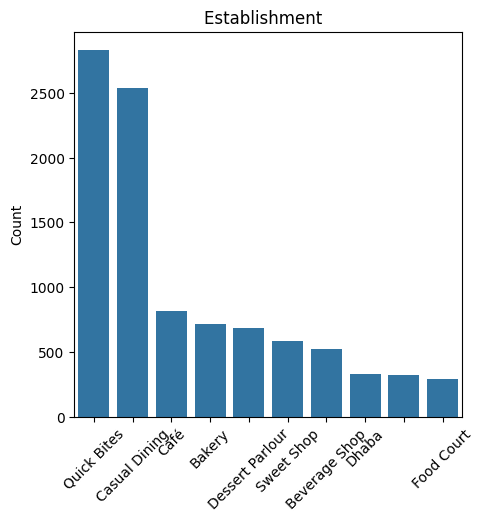

In [42]:
value_counts = df2['establishment'].value_counts()

# Plot bar chart for top N categories
top_categories = value_counts.head(10)  # Adjust number of top categories as needed
plt.figure(figsize=(5, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Establishment  ')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

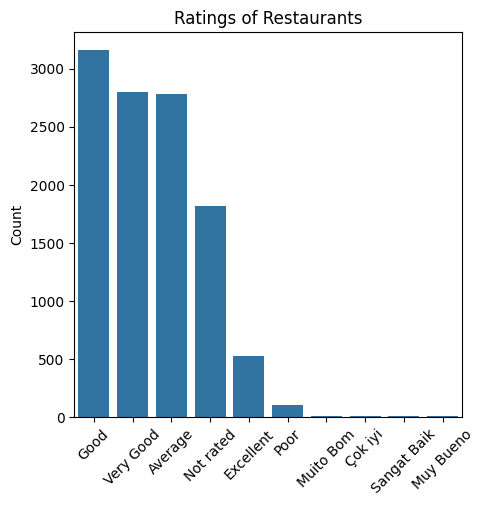

In [43]:
value_counts = df2['rating_text'].value_counts()

# Plot bar chart for top N categories
top_categories = value_counts.head(10)  # Adjust number of top categories as needed
plt.figure(figsize=(5, 5))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Ratings of Restaurants')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [44]:
df2['name'].mode()[0]

"Domino's Pizza"

In [45]:
df2['establishment'].mode()[0]

'Quick Bites'

In [46]:
df2['highlights'].mode()[0]

''

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizing and identifying relationships between variables

count    11291.000000
mean         3.101355
std          1.444956
min          0.000000
25%          2.900000
50%          3.600000
75%          4.000000
max          4.900000
Name: aggregate_rating, dtype: float64


<ipython-input-48-0dc1edd4ceaf>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['aggregate_rating'], shade=True)


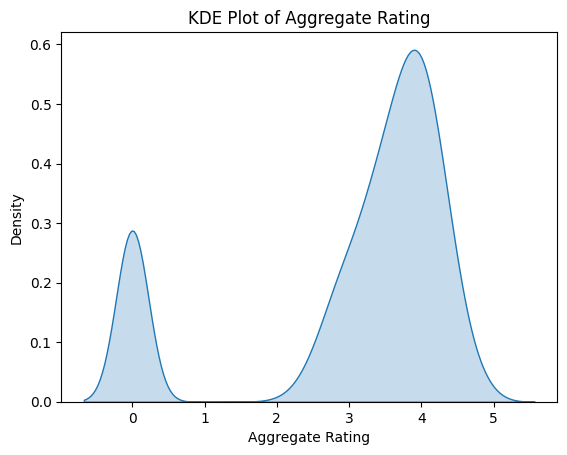

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

#aggregating rating

distribution_of_aggregate_rating = df2['aggregate_rating'].describe()
print(distribution_of_aggregate_rating)

sns.kdeplot(df2['aggregate_rating'], shade=True)
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.title('KDE Plot of Aggregate Rating')
plt.show()

#count of total aggregating rating is 211944
#mean of aggregating rating is 3.3
#std  of 1.2
#min aggregate rating 0, it means all the all the resturants and foods are rated
#25% of aggregate rating is 3.3
#50% of aggregate rating is 3.8
#75% of aggregate rating is 4.1
#max of aggregate rating is more than 4

count    11291.000000
mean       319.293331
std        839.158751
min        -18.000000
25%          8.000000
50%         57.000000
75%        276.000000
max      18967.000000
Name: votes, dtype: float64


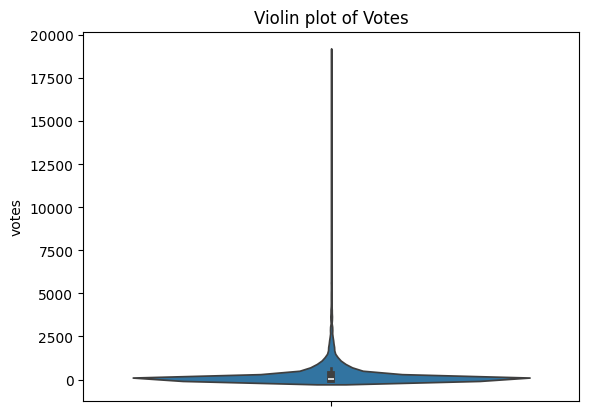

In [49]:
 distribution_of_votes = df2['votes'].describe()

 print(distribution_of_votes)

sns.violinplot(df2['votes'], inner='box')
plt.title('Violin plot of Votes')
plt.show()

#total count of votes is 211944
#mean of votes is 378
#std of votes is 925
#minimum of vote is -18
#25% of vote = 16
#50% of vote = 100
#75% of vote = 362
#max of vote = 42539

# Regional Analysis

In [50]:
df2['takeaway'].describe()

count    11291.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: takeaway, dtype: float64

In [51]:
df2['delivery'].describe()

count    11291.000000
mean        -0.284474
std          0.955997
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          1.000000
Name: delivery, dtype: float64

In [52]:
df2['aggregate_rating'].max()

4.9

In [53]:
df2['aggregate_rating'].min()

0.0

In [54]:
df2['votes'].max()

18967.0

In [55]:
df2['votes'].value_counts()

votes
0.0       933
1.0       450
2.0       328
3.0       305
4.0       242
         ... 
699.0       1
1717.0      1
1722.0      1
2788.0      1
855.0       1
Name: count, Length: 1502, dtype: int64

In [56]:
df2['votes'].min()

# Filtering the rows with negative vote counts
negative_votes = df2[df2['votes'] == 18967]

# Display rows with negative vote counts
print(negative_votes)

#here  Vaishno The Cake Makers is voted badly in Agra City.

       res_id                         name establishment  \
19636   58882  Byg Brewski Brewing Company  Microbrewery   
19931   58882  Byg Brewski Brewing Company  Microbrewery   

                                          address       city  city_id  \
19636  Behind MK Retail, Sarjapur Road, Bangalore  Bangalore        4   
19931  Behind MK Retail, Sarjapur Road, Bangalore  Bangalore        4   

            locality   latitude  longitude zipcode  ...  average_cost_for_two  \
19636  Sarjapur Road  12.912934  77.682906  560035  ...                1600.0   
19931  Sarjapur Road  12.912934  77.682906  560035  ...                1600.0   

      price_range                                         highlights  \
19636         3.0  Lunch', 'Delivery', 'Credit Card', 'Debit Card...   
19931         3.0  Lunch', 'Delivery', 'Credit Card', 'Debit Card...   

       aggregate_rating  rating_text    votes  photo_count opentable_support  \
19636               4.9    Excellent  18967.0       8559.0

In [57]:
df2['votes'].min()

# Filtering the rows with negative vote counts
negative_votes = df2[df2['votes'] == 3.0]

# Display rows with negative vote counts
print(negative_votes.value_counts())

#here  Vaishno The Cake Makers is voted badly in Agra City.

res_id    name                                   establishment  address                                                              city        city_id  locality                   latitude   longitude  zipcode  country_id  locality_verbose                      cuisines                                           average_cost_for_two  price_range  highlights                                                                                                                                                 aggregate_rating  rating_text  votes  photo_count  opentable_support  delivery  takeaway
111225    Shudh Vaishno Bhojnalay                Bhojanalya     Kalupur Railway Station, Kalupur, Ahmedabad                          Ahmedabad   11       Kalupur                    23.029251  72.600235  0        1.0         Kalupur, Ahmedabad                    North Indian                                       200.0                 1.0          Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash',

In [58]:
# Filtering the rows with negative vote counts
highest_voted = df2[df2['votes'] == 18967].count()

# Display rows with negative vote counts
print(highest_voted)

#there are 13 restuarants with highest vote of 18967

res_id                  2
name                    2
establishment           2
address                 2
city                    2
city_id                 2
locality                2
latitude                2
longitude               2
zipcode                 2
country_id              2
locality_verbose        2
cuisines                2
average_cost_for_two    2
price_range             2
highlights              2
aggregate_rating        2
rating_text             2
votes                   2
photo_count             2
opentable_support       2
delivery                2
takeaway                2
dtype: int64


In [59]:
df2[df2['aggregate_rating'] == 3.9].count()

res_id                  754
name                    754
establishment           754
address                 754
city                    754
city_id                 754
locality                754
latitude                754
longitude               754
zipcode                 754
country_id              754
locality_verbose        754
cuisines                754
average_cost_for_two    754
price_range             754
highlights              753
aggregate_rating        754
rating_text             754
votes                   754
photo_count             754
opentable_support       754
delivery                754
takeaway                754
dtype: int64

In [60]:
df2[df2['aggregate_rating'] == 4.9].count()

res_id                  46
name                    46
establishment           46
address                 46
city                    46
city_id                 46
locality                46
latitude                46
longitude               46
zipcode                 46
country_id              46
locality_verbose        46
cuisines                46
average_cost_for_two    46
price_range             46
highlights              46
aggregate_rating        46
rating_text             46
votes                   46
photo_count             46
opentable_support       46
delivery                46
takeaway                46
dtype: int64

In [61]:
df2["establishment"] = df2["establishment"].astype(str)
df2['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', '', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar'],
      dtype=object)

In [62]:
df2['name'].nunique()

8336

<ipython-input-63-cd61b9f9f78d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['aggregate_rating'], shade=True)


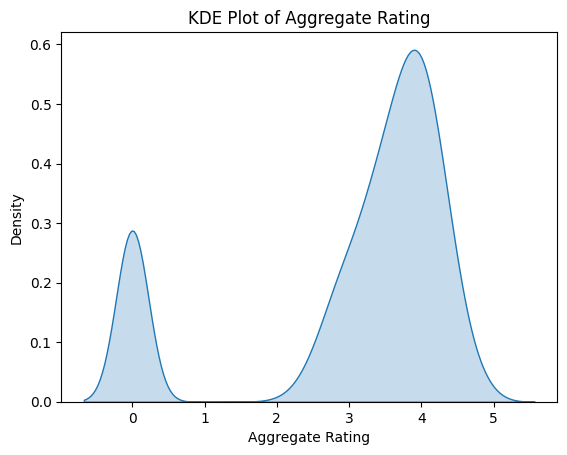

In [63]:
sns.kdeplot(df2['aggregate_rating'], shade=True)
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.title('KDE Plot of Aggregate Rating')
plt.show()

In [64]:
number_of_all_restuarants = df2['name'].value_counts()

number_of_all_restuarants

name
Domino's Pizza                  82
Kanti Sweets                    61
Subway                          58
Cafe Coffee Day                 58
Keventers                       53
                                ..
Suraj chat Bhandar               1
Hip-Hop Momos                    1
Nilesh Chat Bhandar              1
Kaushalya Sweets And Namkeen     1
Maggevala - Curly Cravings       1
Name: count, Length: 8336, dtype: int64

# Correlation Analysis betweeen variables

In [65]:
correlation = df2['votes'].corr(df2['aggregate_rating'])
print("Correlation between Votes and Aggregate Rating :", correlation)
#Correlation between votes and aggregate rating is weak positive

Correlation between Votes and Aggregate Rating : 0.2952405832164476


In [66]:
correlation = df2['delivery'].corr(df2['votes'])
print("Correlation between Votes and Delivery :", correlation)

Correlation between Votes and Delivery : 0.03092874443555088


In [67]:
correlation = df2['city_id'].corr(df2['aggregate_rating'])
print("Correlation between City and Aggregate Rating :", correlation)

Correlation between City and Aggregate Rating : -0.26969698379411494


In [68]:
df2['average_cost_for_two'].value_counts()

average_cost_for_two
300.0     1320
200.0     1313
500.0     1129
400.0     1072
100.0      913
          ... 
1230.0       1
260.0        1
6500.0       1
5500.0       1
240.0        1
Name: count, Length: 80, dtype: int64

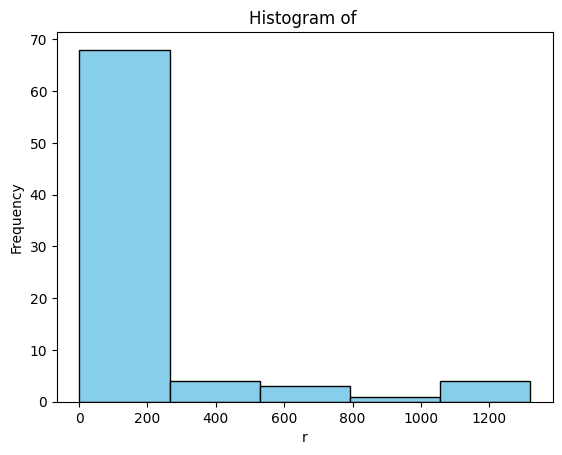

In [69]:
plt.hist(df2['average_cost_for_two'].value_counts(), bins=5, color='skyblue', edgecolor='black')
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Histogram of ')
plt.show()

In [70]:
df2['name'].value_counts()

name
Domino's Pizza                  82
Kanti Sweets                    61
Subway                          58
Cafe Coffee Day                 58
Keventers                       53
                                ..
Suraj chat Bhandar               1
Hip-Hop Momos                    1
Nilesh Chat Bhandar              1
Kaushalya Sweets And Namkeen     1
Maggevala - Curly Cravings       1
Name: count, Length: 8336, dtype: int64

In [71]:
df2['name'].nunique()

8336

In [72]:
correlation = df2['votes'].corr(df2['aggregate_rating'])
print("Correlation between Votes and Aggregate Rating :", correlation)
#Correlation between votes and aggregate rating is weak positive

Correlation between Votes and Aggregate Rating : 0.2952405832164476


In [73]:
df2['votes'].median()

57.0

In [74]:
df2['votes'].mean()

319.2933309715703

In [75]:
df['votes'].min()

-18.0

In [76]:
df2[df2['aggregate_rating'] == 3.5].count()

res_id                  501
name                    501
establishment           501
address                 501
city                    501
city_id                 501
locality                501
latitude                501
longitude               501
zipcode                 501
country_id              501
locality_verbose        501
cuisines                501
average_cost_for_two    501
price_range             501
highlights              501
aggregate_rating        501
rating_text             501
votes                   501
photo_count             501
opentable_support       501
delivery                501
takeaway                501
dtype: int64

In [77]:
df2[df2['aggregate_rating'] == 2.67].count()

res_id                  0
name                    0
establishment           0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [78]:
df2['aggregate_rating'].value_counts()

aggregate_rating
0.0    1821
4.0     775
3.9     754
3.8     700
4.1     694
3.7     648
4.2     576
3.6     574
3.5     501
3.4     473
4.3     464
3.3     438
3.2     364
4.4     350
2.9     319
3.1     299
3.0     268
4.5     234
2.8     214
2.7     189
4.6     144
2.6     131
2.5      92
4.7      74
2.4      49
4.9      46
4.8      45
2.3      35
2.1       9
2.2       8
2.0       2
1.8       1
Name: count, dtype: int64

In [79]:
grouped = df.groupby('cuisines')
for group, data in grouped:
    if group == 'North Indian':
        print(data['aggregate_rating'])

13       4.1
23       4.2
24       4.1
31       4.2
35       4.0
        ... 
33786    4.5
33843    4.7
33870    4.9
33875    4.5
34127    3.8
Name: aggregate_rating, Length: 2976, dtype: float64


In [80]:
df2['cuisines'].mode()[0]

'North Indian'

In [81]:
for index, row in df2.iterrows():
    if row['name'] == 'Bikanervala' :
        print(row['votes'])

814.0
523.0
814.0
647.0
85.0
63.0
407.0
187.0


In [82]:
# Filter rows where 'category' starts with 'A'

filtered_df = df2[df2['name'].str.startswith('D')]
for a in filtered_df:
   print(df2['city'] == 'Banglore')
   break



0        False
1        False
2        False
3        False
4        False
         ...  
34168    False
34169    False
34170    False
34171    False
34172    False
Name: city, Length: 11291, dtype: bool


In [83]:
filtered_df = df2[df2['name'] == 'KFC']

In [84]:
filtered_df.nunique()


res_id                  46
name                     1
establishment            2
address                 46
city                    14
city_id                 11
locality                46
latitude                46
longitude               46
zipcode                  1
country_id               1
locality_verbose        46
cuisines                 2
average_cost_for_two     2
price_range              2
highlights              45
aggregate_rating        12
rating_text              4
votes                   45
photo_count             42
opentable_support        1
delivery                 2
takeaway                 1
dtype: int64

In [85]:
df2[['name', 'city', 'aggregate_rating']].value_counts()

name                    city        aggregate_rating
Sanchi Parlour          Bhopal      0.0                 35
Indira Canteen          Bangalore   0.0                 17
Kanti Sweets            Bangalore   4.0                 13
                                    3.8                 11
Polar Bear              Bangalore   4.2                  8
                                                        ..
Gyani de Chole Bhature  Bhopal      2.6                  1
Gyani's Snacks Corner   Agra        2.9                  1
Gymkhana Pub & Bar      Chandigarh  3.5                  1
Gypsy Turtle            Bangalore   4.2                  1
varadi wada             Amravati    2.8                  1
Name: count, Length: 9948, dtype: int64

In [86]:
a = df2[['city','cuisines',  'rating_text', 'average_cost_for_two' ]]

In [87]:
a.value_counts()

city       cuisines                                                            rating_text  average_cost_for_two
Alappuzha  Bakery                                                              Not rated    100.0                   39
Bhopal     Desserts, Mithai                                                    Not rated    200.0                   32
Bangalore  Mithai, Street Food                                                 Good         500.0                   31
           Desserts, Ice Cream, Bakery, Fast Food                              Very Good    350.0                   31
           Beverages, Desserts, Ice Cream                                      Good         400.0                   30
                                                                                                                    ..
Amritsar   North Indian, Fast Food                                             Average      150.0                    1
           North Indian, European, Continental        

In [88]:
df2.columns

Index(['res_id', 'name', 'establishment', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'average_cost_for_two', 'price_range',
       'highlights', 'aggregate_rating', 'rating_text', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [89]:
df2[['name',  'city']].value_counts()

name                 city      
Kanti Sweets         Bangalore     61
Polar Bear           Bangalore     39
Sanchi Parlour       Bhopal        36
Keventers            Bangalore     30
Frozen Bottle        Bangalore     27
                                   ..
Helly & Chilly Cafe  Ahmedabad      1
Hello Resto-Pub      Bangalore      1
Hees - James Hotel   Chandigarh     1
Heere di hatti       Amritsar       1
varadi wada          Amravati       1
Name: count, Length: 8845, dtype: int64

In [90]:
df2[['name','cuisines','average_cost_for_two', 'city']]

,name,cuisines,average_cost_for_two,city
0,Bikanervala,"North Indian, South Indian, Mithai, Street Foo...",700.0,Agra
1,Mama Chicken Mama Franky House,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600.0,Agra
2,Bhagat Halwai,"Fast Food, Mithai",300.0,Agra
3,Bhagat Halwai,"Desserts, Bakery, Fast Food, South Indian",300.0,Agra
4,The Salt Cafe Kitchen & Bar,"North Indian, Continental, Italian",1000.0,Agra
...,...,...,...,...
34168,Starbucks Coffee,"Cafe, Sandwich",700.0,Chennai
34169,Chai Galli,Cafe,400.0,Chennai
34170,Sandy's Chocolate Laboratory,"Desserts, Continental, Italian, Cafe",1400.0,Chennai
34171,The Chocolate Heaven,"Desserts, Sandwich",600.0,Chennai


In [91]:
df2['city'].max()

'Zirakpur'

In [92]:
df2[['name',  'city', 'cuisines', 'rating_text']].value_counts()

name                    city       cuisines                                rating_text
Kanti Sweets            Bangalore  Mithai, Street Food                     Good           31
Polar Bear              Bangalore  Desserts, Ice Cream, Bakery, Fast Food  Very Good      31
Sanchi Parlour          Bhopal     Desserts, Mithai                        Not rated      30
Kanti Sweets            Bangalore  Mithai, Street Food                     Very Good      26
Keventers               Bangalore  Beverages, Desserts, Ice Cream          Good           23
                                                                                          ..
Happy Belly Bakes       Bangalore  Cafe, Bakery                            Very Good       1
                                   Bakery, Cafe                            Very Good       1
Happy And Healthy Food  Allahabad  Healthy Food                            Average         1
Happinezz               Ahmedabad  Ice Cream, Desserts                     G

In [93]:
df2[['name', 'city']].value_counts()

name                 city      
Kanti Sweets         Bangalore     61
Polar Bear           Bangalore     39
Sanchi Parlour       Bhopal        36
Keventers            Bangalore     30
Frozen Bottle        Bangalore     27
                                   ..
Helly & Chilly Cafe  Ahmedabad      1
Hello Resto-Pub      Bangalore      1
Hees - James Hotel   Chandigarh     1
Heere di hatti       Amritsar       1
varadi wada          Amravati       1
Name: count, Length: 8845, dtype: int64

In [94]:
df2.groupby('city')['name'].count()

city
Agra             892
Ahmedabad       1329
Ajmer            470
Alappuzha        267
Allahabad        567
Amravati         440
Amritsar         692
Aurangabad       693
Bangalore       2365
Bhopal           971
Bhubaneshwar     792
Chandigarh       681
Chennai          360
Gandhinagar       96
Mohali           333
Nayagaon          15
Panchkula        174
Zirakpur         154
Name: name, dtype: int64